In [1]:
import sys
sys.path.append('../')
import numpy as np
from scanHelpers import getSLHAPoints
import glob
import imp
import plotScan
import matplotlib as mpl

In [2]:
#Read random scan points
parsExpr = ["blocks['EXTPAR'][23]","blocks['EXTPAR'][1]",
            "blocks['EXTPAR'][2]","abs(blocks['MASS'][1000024]) - abs(blocks['MASS'][1000022])",
            "abs(blocks['MASS'][1000024])","decays[1000024].totalwidth"]
slhaFolder = '../data/gauginos/slha_tanb10/'
points,slhaFiles = getSLHAPoints(parsExpr,slhaFolder)

In [3]:
#Add MCMC points:
for mcmcFolder in glob.glob('../data/gauginos/slha_tanb10/mcmc_*/'):
    mcmcPoints,mcmcFiles = getSLHAPoints(parsExpr,mcmcFolder)
    points = np.concatenate((points,mcmcPoints))
    slhaFiles = np.concatenate((slhaFiles,mcmcFiles))

In [4]:
#Set global parameters:
params = {'xtick.labelsize' : 25,'ytick.labelsize' : 25, 
          'axes.labelsize' : 35, 'figure.figsize' : (30,20),
         'lines.markersize' : 20}
mpl.rcParams.update(params)

In [18]:
i = np.where(points[:,4] == min(subset[:,4]))[0]
print(points[i],slhaFiles[i])

(array([[-2.37454640e+03,  3.92643890e+03, -1.00000580e+02,
         1.84190000e-01,  1.08687640e+02,  5.14777820e-15,
         9.97845502e-01,  9.99956640e-01]]), array(['mcmc_89_CKJhLI.slha'], dtype='|S21'))


In [1]:
pars = {r'$\mu$' : 0 , r'$M_1$' : 1,  r'$M_2$' : 2, r'$\Delta m$' : 3, r'$m_{\tilde\chi_1^\pm}$' : 4}
coloraxis = {'Width' : 5}
subset = points
subset = subset[subset[:,-1]>0.]
subset = subset[subset[:,-1]<1e-15]
# subset = subset[subset[:,-1]>1e-15]
subset = subset[subset[:,4]<1000.]
fig = plotScan.plotScan(subset,pars,coloraxis,doLog=True,doLines=False)
fig.suptitle('Numper of points = %i (of %i)' %(len(subset),len(points)),y=1.05,fontsize=30)
# print(min(subset[:,4]))

NameError: name 'points' is not defined

101
(9.84740072e-17, '->', 9.5485908e-17)


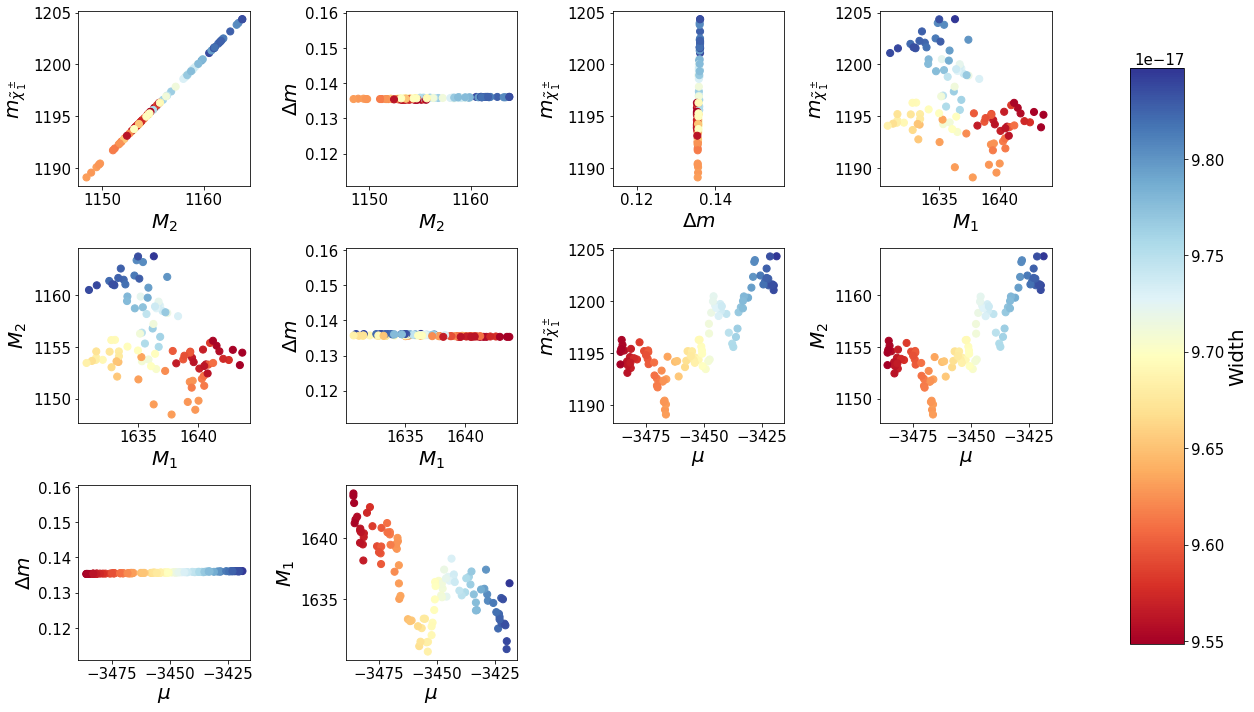

In [79]:
mcmcFolder = '../data/gauginos/slha_tanb10/mcmc_100/'
mcmcPoints,mcmcFiles = getSLHAPoints(parsExpr,mcmcFolder)
subset = mcmcPoints[mcmcPoints[:,-1]>0.]
print(len(subset))
print(max(subset[:,-1]),'->',min(subset[:,-1]))
# subset = subset[subset[:,-1]<1e-15]
# subset = subset[subset[:,4]<1000.]
fig = plotScan.plotScan(subset,pars,coloraxis,doLog=False,doLines=False)
fig.show()